In [5]:
import numpy as np

def dcg_at_k(r, k, method=0):
    """Score is discounted cumulative gain (dcg)

    Relevance is positive real values.  Can use binary
    as the previous methods.

    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114

    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]

    Returns:
        Discounted cumulative gain
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)

    Relevance is positive real values.  Can use binary
    as the previous methods.

    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0

    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]

    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max


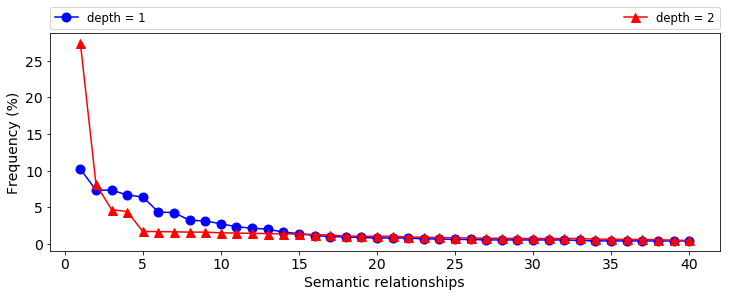

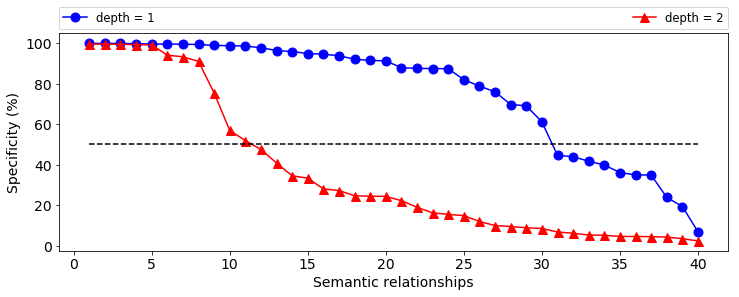

In [21]:
import numpy as np
import os, datetime
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib

dirname = './reverse_walks/num_walks/Stats_05092018/'

fnames = os.listdir(dirname)
#fnames = np.sort([f for f in fnames if 'statistics' in f])

styles = ['b-', 'r-', 'g-', 'm-','c--','y--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'x', 's','+','v','D','o', '^', 'v', 's','+','x','D']
markerSize = 9
plotHeight = 4
plotWidth = 12

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}

matplotlib.rc('font', **font)
topk = 40
fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))

idx = 0
XP = np.arange(1,topk+1)
for depth in np.arange(1,3):
    forwardFile = [f for f in fnames if 'depth_' + str(depth) + '_' in f and 'forward' in f][0]
    forwardData = pd.read_csv(dirname + forwardFile, header=None)
    lastColIdx = forwardData.columns.tolist()[-1:]
    YP = [t[0] for t in forwardData[lastColIdx].values.tolist()][:topk] 
    plt.plot(XP, YP, styles[idx], label='depth = ' + str(depth), marker = markers[idx], markersize = markerSize)
    idx = idx + 1
    
plt.xlabel('Semantic relationships')
plt.ylabel('Frequency (%)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=4, mode="expand", borderaxespad=0.)
#plt.savefig(dirname + "/results/" + 'top_25_frequency.pdf', format='eps', dpi=600, bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))

idx = 0
XP = np.arange(1,topk+1)
for depth in np.arange(1,3):
    reverseFile = [f for f in fnames if 'depth_' + str(depth) + '_' in f and 'reverse' in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    YP = [t[0] for t in reverseData[lastColIdx].values.tolist()][:topk] 
    plt.plot(XP, YP, styles[idx], label='depth = ' + str(depth), marker = markers[idx], markersize = markerSize)
    idx = idx + 1

tt = 50.0*np.ones((len(XP),), dtype=float)
plt.plot(XP, tt, 'k--',label=None)
plt.xlabel('Semantic relationships')
plt.ylabel('Specificity (%)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=4, mode="expand", borderaxespad=0.)
#plt.savefig(dirname + "results/" + 'top_25_specificity.eps', format='eps', dpi=600, bbox_inches='tight')
plt.show()


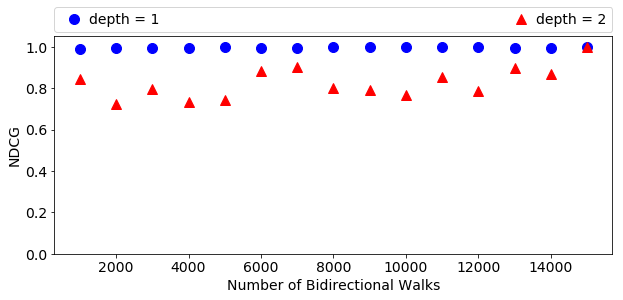

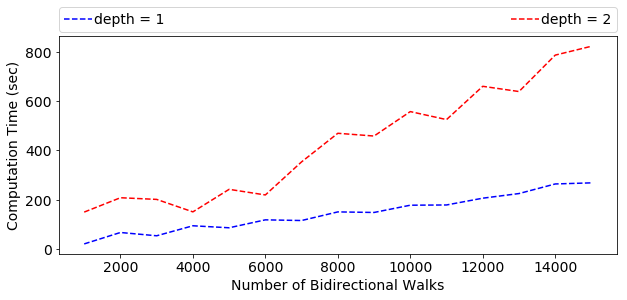

In [29]:
import numpy as np
import os, datetime
import matplotlib.pyplot as plt
import matplotlib
import datetime

dirname = './reverse_walks/num_walks/Stats_05092018/'

fnames = os.listdir(dirname)
fnames = np.sort([f for f in fnames if 'reverse' in f])
walks = list(np.arange(1000,15000+1,1000))
depths = np.arange(1,3)

results_ndcg = np.zeros((len(walks),len(depths)))
results_ndcg[-1,:] = np.ones((len(depths)))

refFiles = np.sort([f for f in fnames if '_' + str(walks[len(walks)-1]) + '_reverse' in f])

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}

matplotlib.rc('font', **font)


#fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))

for depth in depths:
    files_d = [f for f in fnames if 'depth_' + str(depth) in f]
    refFile = list(set(files_d).intersection(set(refFiles)))[0]
    refList = []
    for line in open(dirname + refFile):
        tokens = line.split(',')
        refList.append(','.join(tokens[:-1]))
    
    for wks in walks:
        rf = [f for f in files_d if str(wks) in f][0]
        if rf == refFile:
            continue
        compList = []
        for line in open(dirname + rf):
            tokens = line.split(',')
            #if float(tokens[len(tokens)-1].rstrip().strip()) >= 50.0:
            compList.append(','.join(tokens[:-1]))
        pos = [len(refList) - refList.index(s) if s in refList else 0 for s in compList]
        result_ndcg = ndcg_at_k(pos,len(compList),1)
        results_ndcg[walks.index(wks),depth-1] = result_ndcg
        
fnames = os.listdir(dirname)
fnames = np.sort([f for f in fnames if 'statistics' in f])
results_time = np.zeros((len(walks),len(depths)))

for wks in walks:
    statfile = [f for f in fnames if str(wks) + '_statistics' in f][0]
    with open(dirname + statfile) as f:
        content = f.readlines()
    content = [c.strip().split(':')[1] for c in content if 'reverse' in c]
    results_time[walks.index(wks),:] = content[0:len(depths)]

styles2 = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']
styles = ['bo', 'r^', 'g+', 'kx','co','mo']
plotHeight = 4
plotWidth = 10

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
idx = 0
for depth in depths:
    YP = results_ndcg[:,depth-1]
    plt.plot(walks, YP, styles[idx], label='depth = ' + str(depth), markersize = 10)
    idx = idx + 1

tt = 0.8*np.ones((len(walks),), dtype=float)
plt.xlabel('Number of Bidirectional Walks')

plt.ylim(0.0,1.05)
plt.ylabel('NDCG')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102),# fontsize = 'small',
          ncol=4, mode="expand", borderaxespad=0., handletextpad=0.1)
#plt.savefig('./reverse_walks/results/' + 'num_walks_ndcg.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
idx = 0
for depth in depths:
    YP = results_time[:,depth-1]
    plt.plot(walks, YP, styles2[idx], label='depth = ' + str(depth), markersize = 10)
    idx = idx + 1

#plt.ylim(0.0,1.05)
plt.xlabel('Number of Bidirectional Walks')
plt.ylabel('Computation Time (sec)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102),# fontsize = 'small',
           ncol=4, mode="expand", borderaxespad=0., handletextpad=0.1)
#plt.savefig('./reverse_walks/results/' + 'num_walks_comp_time.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()
